In [262]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from ete3 import Tree
import re
import os

from pymutspec import draw
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu, f_oneway, zscore, spearmanr
from scipy.spatial.distance import pdist, cdist
import re

PATH_TO_NONTER_MS = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/TermAndCock/latest_nonter_midori_ms/ms12syn_iqtree.tsv'
nonter_ms = pd.read_csv(PATH_TO_NONTER_MS, sep='\t')

PATH_TO_TER_MS = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/TermAndCock/latest_ter_midori_ms/ms12syn_iqtree.tsv'
ter_ms = pd.read_csv(PATH_TO_TER_MS, sep='\t')

# NON-TER

### S18 - a (muts per species)

In [263]:
PATH_TO_FOLDER = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/TermAndCock/new_nemu_res/output_nonter_midori/'

dfs = []
titles = []
for dir in os.listdir(PATH_TO_FOLDER):
    if '.' in dir:
        continue
    print(dir)
    PATH_TO_exp = f'{PATH_TO_FOLDER}{dir}/tables/observed_mutations.tsv'
    if os.path.isfile(PATH_TO_exp) and os.path.getsize(PATH_TO_exp) != 0:
        df = pd.read_csv(PATH_TO_exp, sep = '\t')
        df = df.iloc[:, :15]
        df['Species'] = dir
        df['Label'] = df ['Label'].map({0: 'non-syn', 1: 'syn', 2: 'ff'})
        dfs.append(df)
        titles.append(dir)


Celatoblatta_vulgaris
Eupolyphaga_robusta
Bundoksia_longissima
Nocticola_currani
Geoscapheus_dilatatus
Episymploce_wulingensis
Periplaneta_americana
Eupolyphaga_sinensis
Episymploce_potanini
Sigmella_puchihlungi
Periplaneta_brunnea
Cryptocercus_changbaiensis
Periplaneta_fuliginosa
Rhabdoblatta_marginata
Ectobius_lapponicus
Panesthia_tryoni
Rhabdoblatta_sinuata
Supella_longipalpa
Parcoblatta_pensylvanica
Hemiblabera_pabulator
Margattea_concava
Margattea_spinosa
Blattella_lituricollis
Eupolyphaga_hanae
Cryptocercus_hirtus
Rhabdoblatta_nigrovittata
Anaplecta_omei
Rhabdoblatta_melancholica
Margattea_bisignata
Blattella_germanica
Blattella_singularis
Celatoblatta_brunni
Polyzosteria_yingina
Cryptocercus_laojunensis
Blattella_sauteri
Cryptocercus_luanchuanensis
Panchlora_nivea
Cryptocercus_punctulatus
Diploptera_maculata
Hebardina_concinna
Sigmella_normalis
Celatoblatta_quinquemaculata
Cryptocercus_gexigouensis
Brephallus_fruhstorferi
Celatoblatta_notialis
Nocticola_quartermainei
Margattea_s

In [264]:
len(dfs)

52

In [265]:
df = pd.concat(dfs)
df = df[['Mut', 'AltNode', 'ProbaFull', 'Species']]

In [266]:
df

,Mut,AltNode,ProbaFull,Species
0,C[A>T]C,Node3,0.372716,Celatoblatta_vulgaris
1,A[T>C]T,Node3,0.320208,Celatoblatta_vulgaris
2,G[A>G]T,Node3,0.368857,Celatoblatta_vulgaris
3,A[T>C]C,Node3,0.320151,Celatoblatta_vulgaris
4,G[T>C]T,RN_2,0.369272,Celatoblatta_vulgaris
...,...,...,...,...
5,T[C>T]T,Node4,0.369391,Phyllodromica_iberica
6,A[T>C]A,Node4,0.423894,Phyllodromica_iberica
7,A[C>T]C,Node4,0.424030,Phyllodromica_iberica
8,G[T>A]G,RN_5,0.422805,Phyllodromica_iberica


In [267]:
sum = df.groupby('Species')['ProbaFull'].sum()

In [268]:
sum

Species
Anaplecta_omei                  10.983635
Arenivaga_floridensis          288.974543
Blaptica_dubia                   4.989500
Blatta_orientalis                1.990111
Blattella_bisignata             70.090631
Blattella_germanica            106.480590
Blattella_lituricollis          31.210365
Blattella_nipponica             58.480327
Blattella_sauteri                2.994528
Blattella_singularis             3.566928
Brephallus_fruhstorferi          9.823848
Bundoksia_longissima            28.381356
Celatoblatta_brunni              3.995514
Celatoblatta_notialis           18.986274
Celatoblatta_vulgaris            9.298772
Cryptocercus_changbaiensis       3.987996
Cryptocercus_gexigouensis        1.996614
Cryptocercus_hirtus              3.000434
Cryptocercus_laojunensis        24.182779
Cryptocercus_luanchuanensis      6.960027
Cryptocercus_punctulatus       344.223184
Diploptera_maculata              1.995125
Episymploce_potanini            21.218963
Eupolyphaga_robusta       

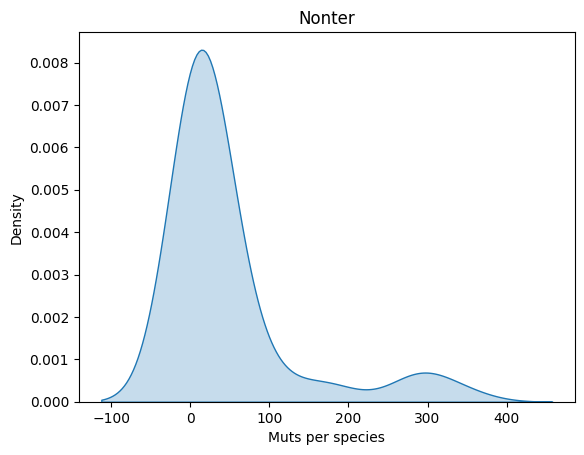

In [269]:
sns.kdeplot(data=sum, fill=True)

plt.xlabel('Muts per species')
plt.ylabel('Density')
plt.title('Nonter')
plt.show()

In [270]:
df

,Mut,AltNode,ProbaFull,Species
0,C[A>T]C,Node3,0.372716,Celatoblatta_vulgaris
1,A[T>C]T,Node3,0.320208,Celatoblatta_vulgaris
2,G[A>G]T,Node3,0.368857,Celatoblatta_vulgaris
3,A[T>C]C,Node3,0.320151,Celatoblatta_vulgaris
4,G[T>C]T,RN_2,0.369272,Celatoblatta_vulgaris
...,...,...,...,...
5,T[C>T]T,Node4,0.369391,Phyllodromica_iberica
6,A[T>C]A,Node4,0.423894,Phyllodromica_iberica
7,A[C>T]C,Node4,0.424030,Phyllodromica_iberica
8,G[T>A]G,RN_5,0.422805,Phyllodromica_iberica


In [271]:
df['Mut'] = df['Mut'].str.extract(r'\[(.*?)\]')

In [272]:
df.groupby('Mut')['ProbaFull'].sum()

Mut
A>C     61.321491
A>G    406.942587
A>T    152.126089
C>A     39.178545
C>G     10.531825
C>T    620.528687
G>A    185.169372
G>C      9.059328
G>T     17.494784
T>A    116.510163
T>C    791.595060
T>G     34.737966
Name: ProbaFull, dtype: float64

Text(0.5, 1.0, 'Nonter')

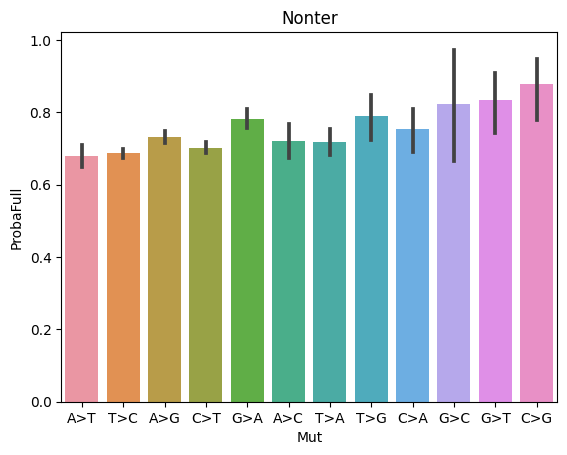

In [273]:
sns.barplot(x='Mut', y='ProbaFull', data=df)
plt.title('Nonter')

### S18 - b (muts per branch)

In [274]:
sum = df.groupby(['Species', 'AltNode'])['ProbaFull'].sum()

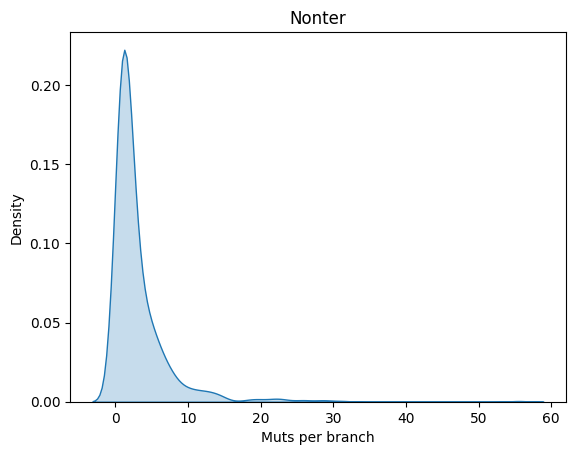

In [275]:
sns.kdeplot(data=sum, fill=True)

plt.xlabel('Muts per branch')
plt.ylabel('Density')
plt.title('Nonter')
plt.show()

In [276]:
to_remove = sum[sum > 6].index.to_list()

In [277]:
filtered_df = df[~df.apply(lambda row: (row['Species'], row['AltNode']) in to_remove, axis=1)]

In [278]:
filtered_df

,Mut,AltNode,ProbaFull,Species
0,A>T,Node3,0.372716,Celatoblatta_vulgaris
1,T>C,Node3,0.320208,Celatoblatta_vulgaris
2,A>G,Node3,0.368857,Celatoblatta_vulgaris
3,T>C,Node3,0.320151,Celatoblatta_vulgaris
4,T>C,RN_2,0.369272,Celatoblatta_vulgaris
...,...,...,...,...
5,C>T,Node4,0.369391,Phyllodromica_iberica
6,T>C,Node4,0.423894,Phyllodromica_iberica
7,C>T,Node4,0.424030,Phyllodromica_iberica
8,T>A,RN_5,0.422805,Phyllodromica_iberica


In [279]:
filtered_df[filtered_df['AltNode'] == 'Node10']

,Mut,AltNode,ProbaFull,Species
358,T>C,Node10,0.578595,Geoscapheus_dilatatus
48,T>G,Node10,0.844689,Periplaneta_americana
35,T>C,Node10,0.968348,Blattella_lituricollis
36,T>C,Node10,0.968348,Blattella_lituricollis
37,T>C,Node10,0.968348,Blattella_lituricollis
15,C>T,Node10,0.885642,Rhabdoblatta_nigrovittata
79,C>T,Node10,0.992624,Blattella_germanica
127,T>C,Node10,0.792757,Panchlora_nivea
128,C>T,Node10,0.651115,Panchlora_nivea
343,C>T,Node10,0.970554,Cryptocercus_punctulatus


In [280]:
sum = filtered_df.groupby(['Species', 'AltNode'])['ProbaFull'].sum()

In [281]:
sum

Species                AltNode
Anaplecta_omei         Node2      3.172317
                       Node3      1.382715
                       Node4      2.125603
                       RN_1       0.999618
                       RN_3       0.304748
                                    ...   
Sigmella_schenklingi   RN_90      1.891136
                       RN_94      2.218098
Sinatablatta_hoplites  RN_1       0.999067
                       RN_3       0.999533
Supella_longipalpa     RN_3       0.891518
Name: ProbaFull, Length: 686, dtype: float64

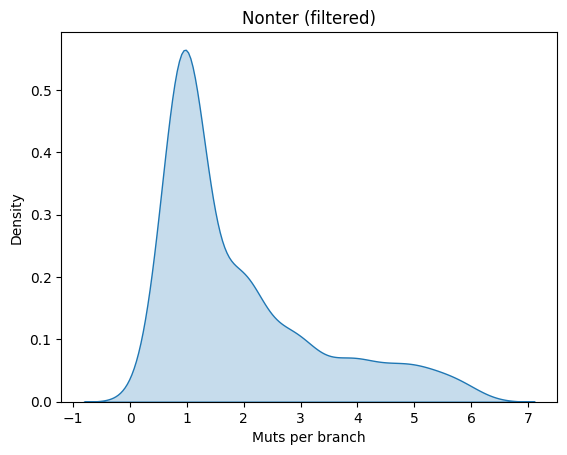

In [282]:
sns.kdeplot(data=sum, fill=True)

plt.xlabel('Muts per branch')
plt.ylabel('Density')
plt.title('Nonter (filtered)')
plt.show()

### S18 - d (Ts fraction (AG+GA+CT+TC/sum(total)))

In [283]:
total = filtered_df.groupby('Species')['ProbaFull'].sum()
ts = filtered_df[filtered_df['Mut'].isin(['A>G','G>A','C>T','T>C'])].groupby('Species')['ProbaFull'].sum()

In [284]:
ts_fraction = ts / total

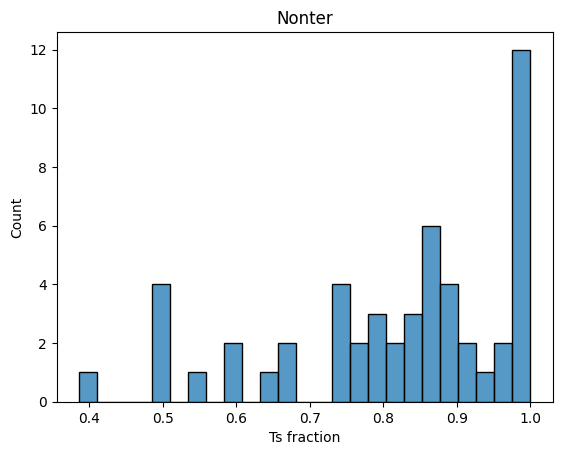

In [285]:
sns.histplot(ts_fraction, bins=25)

plt.xlabel('Ts fraction')
plt.title('Nonter')
plt.show()

### Non-ter ms update

In [286]:
sum_obsnum = filtered_df.groupby(['Mut', 'Species'])['ProbaFull'].sum().reset_index().sort_values(by=['Species'])
sum_obsnum.columns = ['Mut', 'Species', 'ObsNum']

In [287]:
nonter_ms = nonter_ms.drop(columns=['ObsNum']).merge(sum_obsnum[['Mut', 'Species', 'ObsNum']], on=['Mut', 'Species'], how='left').fillna(0)

nonter_ms['Obs/Exp'] = (nonter_ms['ObsNum'] / nonter_ms['ExpNum'])
sum = nonter_ms.groupby('Species')['Obs/Exp'].sum().reset_index()
nonter_ms = nonter_ms.merge(sum, on='Species', suffixes=('', '_sum'))
nonter_ms['MutSpec'] = nonter_ms['Obs/Exp']/nonter_ms['Obs/Exp_sum']
nonter_ms = nonter_ms.drop(columns=['Obs/Exp', 'Obs/Exp_sum'])
nonter_ms = nonter_ms.fillna(0)
nonter_ms.to_csv('/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/TermAndCock/latest_nonter_midori_ms/filtered_ms12syn_iqtree.tsv', sep='\t', index=False)

In [288]:
nonter_ms

,Species,Mut,ExpNum,MutSpec,ObsNum
0,Celatoblatta_vulgaris,A>G,42.486100,0.103023,2.094116
1,Celatoblatta_vulgaris,A>T,25.071800,0.110660,1.327371
2,Celatoblatta_vulgaris,T>C,40.910800,0.252570,4.943531
3,Celatoblatta_vulgaris,G>A,0.739461,0.000000,0.000000
4,Celatoblatta_vulgaris,C>A,0.628957,0.000000,0.000000
...,...,...,...,...,...
799,Phyllodromica_iberica,A>C,81.317000,0.000000,0.000000
800,Phyllodromica_iberica,A>T,81.317000,0.000000,0.000000
801,Phyllodromica_iberica,G>C,4.228780,0.000000,0.000000
802,Phyllodromica_iberica,G>A,9.062380,0.640789,0.997601


# TER

### S18 - a (muts per species)

In [289]:
PATH_TO_FOLDER = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/TermAndCock/new_nemu_res/output_ter_midori/'

dfs = []
titles = []
for dir in os.listdir(PATH_TO_FOLDER):
    if '.' in dir:
        continue
    print(dir)
    PATH_TO_exp = f'{PATH_TO_FOLDER}{dir}/tables/observed_mutations.tsv'
    if os.path.isfile(PATH_TO_exp) and os.path.getsize(PATH_TO_exp) != 0:
        df = pd.read_csv(PATH_TO_exp, sep = '\t')
        df = df.iloc[:, :15]
        df['Species'] = dir
        df['Label'] = df ['Label'].map({0: 'non-syn', 1: 'syn', 2: 'ff'})
        dfs.append(df)
        titles.append(dir)


Reticulitermes_grassei
Reticulitermes_kanmonensis
Macrotermes_herus
Microcerotermes_parvus
Reticulitermes_lucifugus
Reticulitermes_aculabialis
Reticulitermes_virginicus
Embiratermes_neotenicus
Silvestritermes_minutus
Coptotermes_frenchi
Nitiditermes_proximatus
Heterotermes_crinitus
Neocapritermes_opacus
Cryptotermes_domesticus
Reticulitermes_banyulensis
Odontotermes_sarawakensis
Anacanthotermes_ochraceus
Macrotermes_subhyalinus
Heterotermes_lauralinearum
Heterotermes_tenuis
Neotermes_castaneus
Nasutitermes_canaliculatus
Coptotermes_michaelseni
Trinervitermes_trinervoides
Coptotermes_acinaciformis
Trinervitermes_geminatus
Embiratermes_chagresi
Aparatermes_cingulatus
Nasutitermes_matangensis
Reticulitermes_urbis
Zootermopsis_nevadensis
Coptotermes_gestroi
Macrotermes_gilvus
Neotermes_holmgreni
Reticulitermes_nelsonae
Nasutitermes_ephratae
Coptotermes_lacteus
Ancistrotermes_pakistanicus
Reticulitermes_speratus
Ancistrotermes_cavithorax
Heterotermes_cardini
Coptotermes_formosanus
Composite

In [290]:
len(dfs)

50

In [291]:
df = pd.concat(dfs)
df = df[['Mut', 'AltNode', 'ProbaFull', 'Species']]

In [292]:
sum = df.groupby('Species')['ProbaFull'].sum()

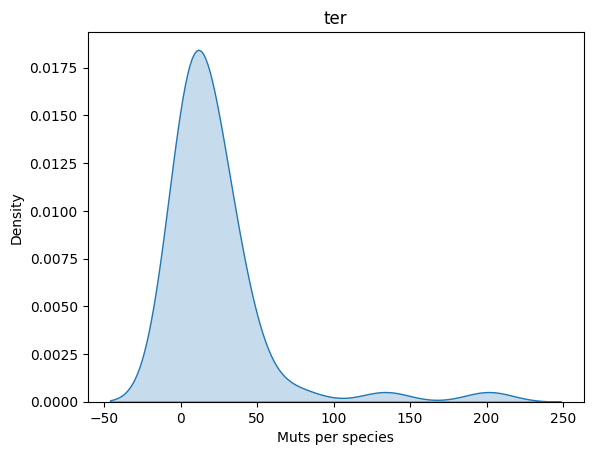

In [293]:
sns.kdeplot(data=sum, fill=True)

plt.xlabel('Muts per species')
plt.ylabel('Density')
plt.title('ter')
plt.show()

In [294]:
df

,Mut,AltNode,ProbaFull,Species
0,C[C>T]A,Node2,0.593670,Reticulitermes_grassei
1,G[A>G]G,Node3,0.357018,Reticulitermes_grassei
2,T[A>G]C,Node12,0.595633,Reticulitermes_grassei
3,T[T>C]C,Node20,0.596003,Reticulitermes_grassei
4,A[T>C]T,Node19,0.998535,Reticulitermes_grassei
...,...,...,...,...
15,C[C>T]G,RN_5,0.878281,Macrotermes_falciger
16,A[C>T]A,RN_5,0.878281,Macrotermes_falciger
17,T[C>T]C,RN_5,0.878281,Macrotermes_falciger
18,A[T>C]C,RN_5,0.878281,Macrotermes_falciger


In [295]:
df['Mut'] = df['Mut'].str.extract(r'\[(.*?)\]')

In [296]:
df.groupby('Mut')['ProbaFull'].sum()

Mut
A>C     38.978683
A>G    219.058982
A>T     53.385547
C>A     40.592185
C>G     16.974455
C>T    299.383840
G>A    141.452041
G>C      8.343872
G>T     13.015053
T>A     29.866614
T>C    249.195780
T>G     14.518927
Name: ProbaFull, dtype: float64

Text(0.5, 1.0, 'ter')

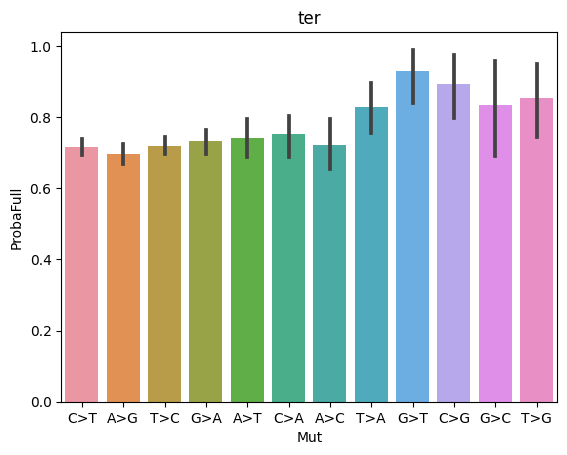

In [297]:
sns.barplot(x='Mut', y='ProbaFull', data=df)
plt.title('ter')

### S18 - b (muts per branch)

In [298]:
sum = df.groupby(['Species', 'AltNode'])['ProbaFull'].sum()

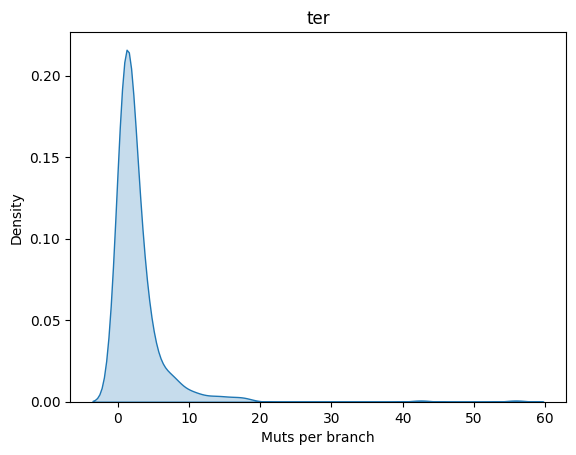

In [299]:
sns.kdeplot(data=sum, fill=True)

plt.xlabel('Muts per branch')
plt.ylabel('Density')
plt.title('ter')
plt.show()

In [300]:
to_remove = sum[sum > 6].index.to_list()

In [301]:
filtered_df = df[~df.apply(lambda row: (row['Species'], row['AltNode']) in to_remove, axis=1)]

In [302]:
filtered_df

,Mut,AltNode,ProbaFull,Species
0,C>T,Node2,0.593670,Reticulitermes_grassei
1,A>G,Node3,0.357018,Reticulitermes_grassei
2,A>G,Node12,0.595633,Reticulitermes_grassei
3,T>C,Node20,0.596003,Reticulitermes_grassei
4,T>C,Node19,0.998535,Reticulitermes_grassei
...,...,...,...,...
0,C>T,Node3,0.959770,Odontotermes_malaccensis
1,T>C,Node3,0.959808,Odontotermes_malaccensis
2,C>T,Node3,0.959770,Odontotermes_malaccensis
3,T>C,Node3,0.959818,Odontotermes_malaccensis


In [303]:
filtered_df[filtered_df['AltNode'] == 'Node10']

,Mut,AltNode,ProbaFull,Species
10,T>C,Node10,0.999427,Reticulitermes_virginicus
14,T>C,Node10,0.382654,Reticulitermes_banyulensis
15,A>G,Node10,0.363842,Reticulitermes_banyulensis
16,A>G,Node10,0.363860,Reticulitermes_banyulensis
17,A>T,Node10,0.406544,Reticulitermes_banyulensis
64,G>A,Node10,0.998604,Anacanthotermes_ochraceus
73,C>T,Node10,0.999875,Macrotermes_subhyalinus
41,A>G,Node10,0.953781,Heterotermes_tenuis
197,T>C,Node10,0.969393,Coptotermes_acinaciformis
0,C>A,Node10,0.361945,Compositermes_vindai


In [304]:
sum = filtered_df.groupby(['Species', 'AltNode'])['ProbaFull'].sum()

In [305]:
sum

Species                     AltNode
Anacanthotermes_ochraceus   Node10     0.998604
                            Node12     0.915328
                            Node14     0.978639
                            Node15     0.979362
                            Node22     0.887064
                                         ...   
Zootermopsis_angusticollis  RN_2       1.998646
                            RN_4       1.998826
Zootermopsis_nevadensis     RN_1       2.240300
                            RN_3       0.999859
                            RN_4       1.760431
Name: ProbaFull, Length: 372, dtype: float64

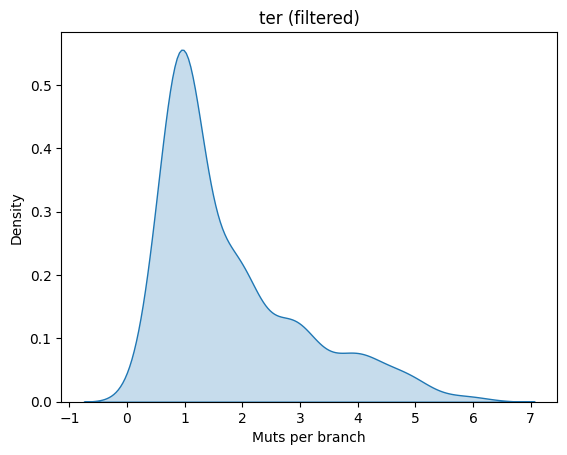

In [306]:
sns.kdeplot(data=sum, fill=True)

plt.xlabel('Muts per branch')
plt.ylabel('Density')
plt.title('ter (filtered)')
plt.show()

### S18 - d (Ts fraction (AG+GA+CT+TC/sum(total)))

In [307]:
total = filtered_df.groupby('Species')['ProbaFull'].sum()
ts = filtered_df[filtered_df['Mut'].isin(['A>G','G>A','C>T','T>C'])].groupby('Species')['ProbaFull'].sum()

In [308]:
ts_fraction = ts / total

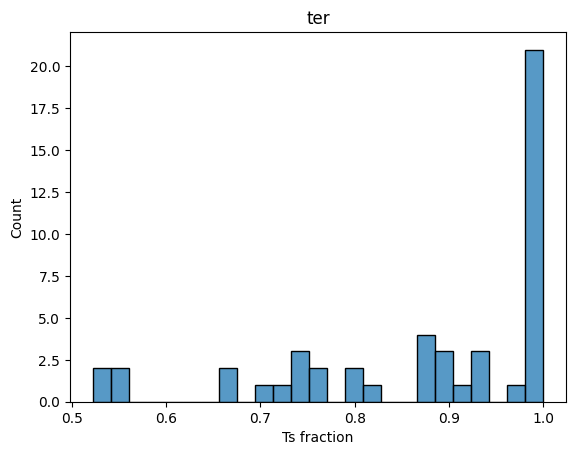

In [309]:
sns.histplot(ts_fraction, bins=25)

plt.xlabel('Ts fraction')
plt.title('ter')
plt.show()

### Ter ms update

In [310]:
sum_obsnum = filtered_df.groupby(['Mut', 'Species'])['ProbaFull'].sum().reset_index().sort_values(by=['Species'])
sum_obsnum.columns = ['Mut', 'Species', 'ObsNum']

In [311]:
ter_ms = ter_ms.drop(columns=['ObsNum']).merge(sum_obsnum[['Mut', 'Species', 'ObsNum']], on=['Mut', 'Species'], how='left').fillna(0)

ter_ms['Obs/Exp'] = (ter_ms['ObsNum'] / ter_ms['ExpNum'])
sum = ter_ms.groupby('Species')['Obs/Exp'].sum().reset_index()
ter_ms = ter_ms.merge(sum, on='Species', suffixes=('', '_sum'))
ter_ms['MutSpec'] = ter_ms['Obs/Exp']/ter_ms['Obs/Exp_sum']
ter_ms = ter_ms.drop(columns=['Obs/Exp', 'Obs/Exp_sum'])
ter_ms = ter_ms.fillna(0)
ter_ms.to_csv('/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/TermAndCock/latest_ter_midori_ms/filtered_ms12syn_iqtree.tsv', sep='\t', index=False)

In [312]:
ter_ms

,Species,Mut,ExpNum,MutSpec,ObsNum
0,Reticulitermes_grassei,A>G,80.1954,0.133481,6.350114
1,Reticulitermes_grassei,C>T,42.2766,0.047590,1.193506
2,Reticulitermes_grassei,G>A,11.4283,0.648109,4.393822
3,Reticulitermes_grassei,T>C,33.4657,0.170821,3.391200
4,Reticulitermes_grassei,A>T,58.2557,0.000000,0.000000
...,...,...,...,...,...
727,Macrotermes_falciger,G>C,0.0000,0.000000,0.000000
728,Macrotermes_falciger,G>T,0.0000,0.000000,0.000000
729,Macrotermes_falciger,T>A,0.0000,0.000000,0.000000
730,Macrotermes_falciger,T>C,0.0000,0.000000,0.000000


# OLD, for expected muts

KeyError: 'Node'

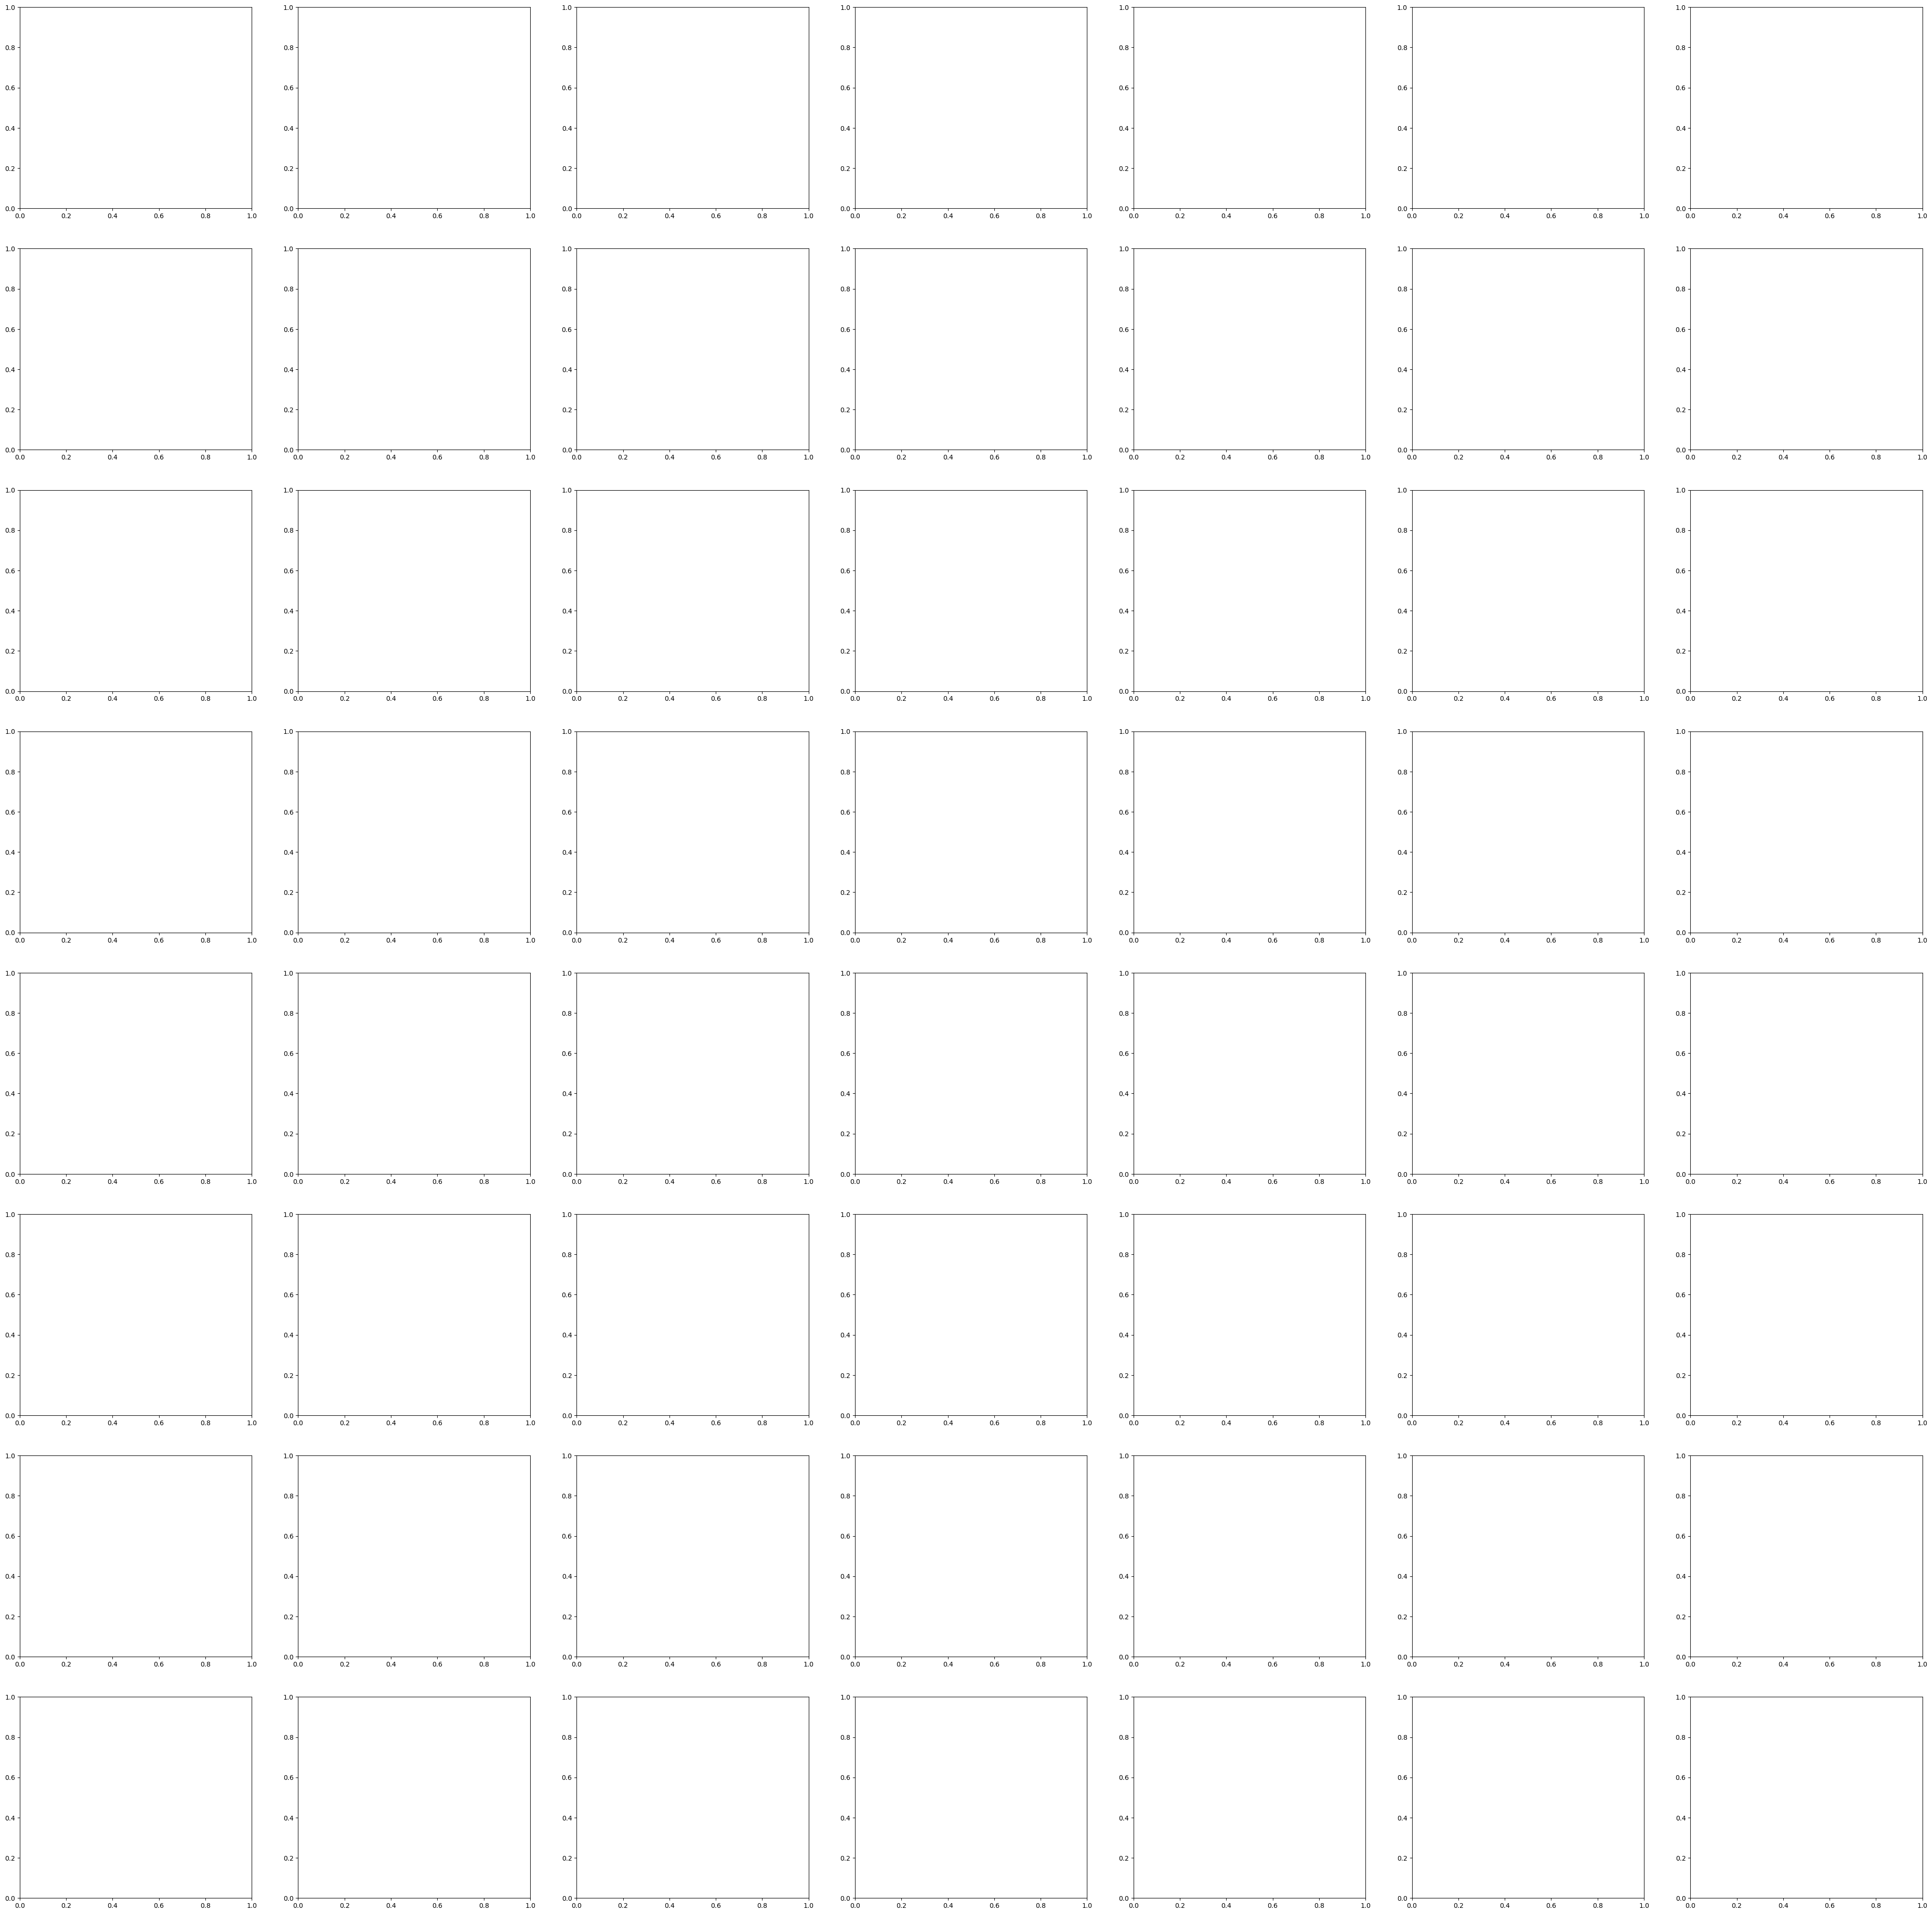

In [313]:

n_rows = 8
n_cols = 7  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(52, 52))

colors = {'all': 'blue', 'syn': 'green', 'ff': 'orange'}
positions = {'all': 0, 'syn': 0.2, 'ff': 0.4}  # Nesting offsets
bar_width = 0.3 

if n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()  # Flatten to make it iterable


for ax, df, title in zip(axes, dfs, titles):
    nodes = df['Node'].unique()
    
    for i, node in enumerate(nodes):
        node_data = df[df['Node'] == node].set_index('Label')

        # Plot "C>T" bars
        ax.bar(i - bar_width/2, node_data['C>T']['all'], color=colors['all'], label="all (C>T)" if i == 0 else "", width=bar_width)
        ax.bar(i - bar_width/2 + positions['syn'], node_data['C>T']['syn'], color=colors['syn'], label="syn (C>T)" if i == 0 else "", width=bar_width)
        ax.bar(i - bar_width/2 + positions['ff'], node_data['C>T']['ff'], color=colors['ff'], label="ff (C>T)" if i == 0 else "", width=bar_width)

        # Plot "G>A" bars next to "C>T"
        ax.bar(i + bar_width/2, node_data['G>A']['all'], color=colors['all'], alpha=0.5, label="all (G>A)" if i == 0 else "", width=bar_width, hatch='//')
        ax.bar(i + bar_width/2 + positions['syn'], node_data['G>A']['syn'], color=colors['syn'], alpha=0.5, label="syn (G>A)" if i == 0 else "", width=bar_width, hatch='//')
        ax.bar(i + bar_width/2 + positions['ff'], node_data['G>A']['ff'], color=colors['ff'], alpha=0.5, label="ff (G>A)" if i == 0 else "", width=bar_width, hatch='//')

    ax.set_xticks(range(len(nodes)))
    ax.set_xticklabels(nodes)
    ax.set_ylabel("C>T")
    ax.set_xlabel("Node")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
ts_tv = {}

for df in dfs:
    syn_data = df[df['Label'] == 'syn']  # Step 1: Filter "syn" label
    syn_data['ratio'] = syn_data['A>G'] + syn_data['G>A'] + syn_data['C>T'] + syn_data['T>C']/ syn_data['A>C'] + syn_data['C>A'] + syn_data['A>T'] + syn_data['T>A'] + syn_data['C>G'] + syn_data['G>C'] + syn_data['G>T'] + syn_data['T>G'] # Step 2: Compute ratio
    mean_ratio = syn_data['ratio'].mean()  # Step 3: Compute mean
    ts_tv[syn_data['Species'].unique().tolist()[0]] = mean_ratio


/tmp/ipykernel_5319/2318443048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_data['ratio'] = syn_data['A>G'] + syn_data['G>A'] + syn_data['C>T'] + syn_data['T>C']/ syn_data['A>C'] + syn_data['C>A'] + syn_data['A>T'] + syn_data['T>A'] + syn_data['C>G'] + syn_data['G>C'] + syn_data['G>T'] + syn_data['T>G'] # Step 2: Compute ratio
/tmp/ipykernel_5319/2318443048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_data['ratio'] = syn_data['A>G'] + syn_data['G>A'] + syn_data['C>T'] + syn_data['T>C']

In [ ]:
ts_tv

{'Celatoblatta_vulgaris': 129.38919345590733,
 'Eupolyphaga_robusta': 279.9877075743891,
 'Bundoksia_longissima': 258.353598168313,
 'Nocticola_currani': 219.14732956018807,
 'Geoscapheus_dilatatus': 510.517153000727,
 'Periplaneta_americana': 287.73453417283685,
 'Eupolyphaga_sinensis': 274.2276410278631,
 'Episymploce_potanini': 234.24081738710743,
 'Periplaneta_brunnea': 233.79449655008284,
 'Cryptocercus_changbaiensis': 322.41522168234184,
 'Periplaneta_fuliginosa': 241.0525764178846,
 'Rhabdoblatta_marginata': 247.10623264516602,
 'Panesthia_tryoni': 475.4354956283386,
 'Rhabdoblatta_sinuata': 294.2655030409831,
 'Supella_longipalpa': 267.7791391636008,
 'Parcoblatta_pensylvanica': 292.303536074724,
 'Hemiblabera_pabulator': 223.60532090840576,
 'Margattea_spinosa': 286.3035329319436,
 'Blattella_lituricollis': 285.6786837329776,
 'Cryptocercus_hirtus': 209.51674822075665,
 'Rhabdoblatta_nigrovittata': 295.9460997582415,
 'Anaplecta_omei': 290.24380729290937,
 'Margattea_bisignata